<a href="https://colab.research.google.com/github/swastikbanerjee/ML-Project-/blob/main/Indian_Nobel_Laureate_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Cleaning : Picking valid images, cropping them and storing them in a separate folder

In [ ]:
import os
import cv2

# Define the path to the data and the path to store cropped images
path_to_data = "/content/drive/MyDrive/dataset"
path_to_cr_data = "/content/drive/MyDrive/cropped_dataset"

# Load the Haar Cascade classifiers for face, nose, and mouth detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
nose_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/opencv_haar cascades/haarcascade_mcs_nose.xml')
mouth_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/opencv_haar cascades/haarcascade_mcs_mouth.xml')

def get_cropped_image_with_features(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # Detect nose and mouth in the face region
        noses = nose_cascade.detectMultiScale(roi_gray)
        mouths = mouth_cascade.detectMultiScale(roi_gray)

        # Check if at least one nose and one mouth are detected
        if len(noses) >= 1 and len(mouths) >= 1:
            return roi_color

    return None

img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    for entry in os.scandir(img_dir):
        print(entry.path)
        cropped_image = get_cropped_image_with_features(entry.path)

        cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
        if cropped_image is not None:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                print("Generating cropped images in folder:", cropped_folder)

            # Save the cropped image
            cv2.imwrite(os.path.join(cropped_folder, entry.name), cropped_image)


Defining the Wavelet Transform Function for Feature Engineering

In [ ]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

Displaying a typical Wavelet Transformed Image

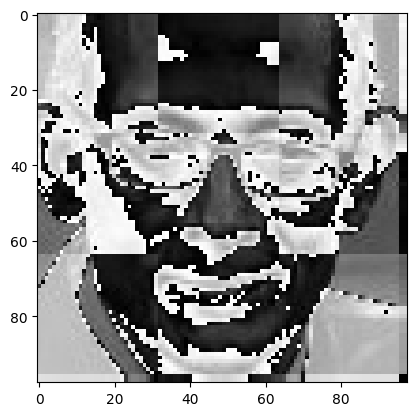

In [ ]:
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/11nobel1.jpg')
if img is not None:
    im_har = w2d(img, 'db1', 5)
    plt.imshow(im_har, cmap='gray')
else:
    print("Error loading image.")

List of clean image folders

In [ ]:
clean_image_dirs = [
    '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped',
    '/content/drive/MyDrive/clean_dataset/amartya sen_cropped',
    '/content/drive/MyDrive/clean_dataset/cv raman_cropped',
    '/content/drive/MyDrive/clean_dataset/har gobind khorana_cropped',
    '/content/drive/MyDrive/clean_dataset/kailash satyarthi_cropped',
    '/content/drive/MyDrive/clean_dataset/mother teresa_cropped',
    '/content/drive/MyDrive/clean_dataset/rabindranath tagore_cropped',
    '/content/drive/MyDrive/clean_dataset/subrahmanyan chandrasekhar_cropped',
    '/content/drive/MyDrive/clean_dataset/venkatraman ramakrishnan_cropped'
]

Organizing file paths for all valid images

In [ ]:
import os
celebrity_file_names_dict = {}
for img_dir in clean_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'abhijit banerjee_cropped': ['/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/72471047.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/Abhijit_Banerjee_1636820637723_1636820672768.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/abhijit_20headshot.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/MIT-Good-Economics_4.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/maxresdefault.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/800_443660124c7c65a.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/Abhijit_2520banerjee_2520kolkata_25202.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/Abhijit_Banerjee_FT_Goldman_Sachs_Business_Book_of_the_Year_Award_2011__28cropped_29.jpg',
  '/content/drive/MyDrive/clean_dataset/abhijit banerjee_cropped/Abhijit_2520banerjee_2520Kolkata_25201.jpg',
  '/content/drive/MyDrive/clean_dataset/ab

Indexing file folders

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'abhijit banerjee_cropped': 0,
 'amartya sen_cropped': 1,
 'cv raman_cropped': 2,
 'har gobind khorana_cropped': 3,
 'kailash satyarthi_cropped': 4,
 'mother teresa_cropped': 5,
 'rabindranath tagore_cropped': 6,
 'subrahmanyan chandrasekhar_cropped': 7,
 'venkatraman ramakrishnan_cropped': 8}

X stores combined image, y stores corresponding image labels

In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [ ]:
len(X)

511

Reshaping X list into 2 dimension

In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(511, 4096)

Importing Support Vector Machine ML Model



In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

Splitting X, y into training and testing sets and calculating accuracy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 3))]) #C value chosen by trial and error, value stops increasing after 3
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.84375

In [ ]:
len(X_test)

128

Classification Report

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.64      0.72        14
           2       0.89      0.73      0.80        11
           3       0.72      0.87      0.79        15
           4       0.95      0.95      0.95        19
           5       1.00      0.93      0.97        15
           6       1.00      1.00      1.00        10
           7       0.87      0.76      0.81        17
           8       0.65      0.88      0.75        17

    accuracy                           0.84       128
   macro avg       0.86      0.84      0.85       128
weighted avg       0.86      0.84      0.85       128



Importing Logistic Regression, Random Forest Classifier ML Model

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

Defining parameters for all 3 models

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

Comparing Evaluation Scores for all 3 Supervised Classification ML Model

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.835578,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.683971,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.859023,{'logisticregression__C': 1}


Results for validation set made by GridSearchCV on training data

In [ ]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

Evaluation on test data

In [ ]:
best_estimators['svm'].score(X_test,y_test)

0.8671875

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

0.6328125

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.875

In [ ]:
best_clf = best_estimators['logistic_regression']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 2,  7,  0,  3,  1,  0,  1,  0,  0],
       [ 0,  0, 11,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 12,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 19,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 15,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 15,  1],
       [ 1,  1,  0,  0,  0,  0,  0,  0, 15]])

Confusion Matrix Visualization for Logistic Regression

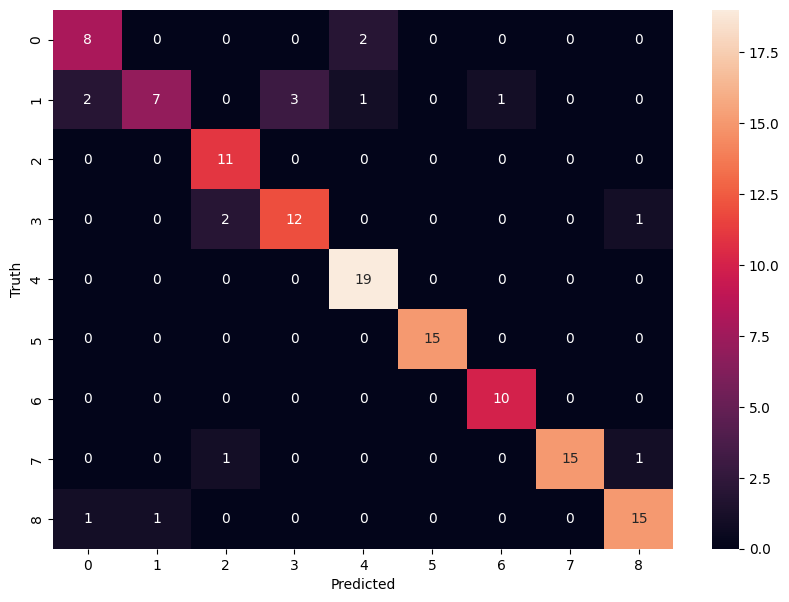

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
class_dict

{'abhijit banerjee_cropped': 0,
 'amartya sen_cropped': 1,
 'cv raman_cropped': 2,
 'har gobind khorana_cropped': 3,
 'kailash satyarthi_cropped': 4,
 'mother teresa_cropped': 5,
 'rabindranath tagore_cropped': 6,
 'subrahmanyan chandrasekhar_cropped': 7,
 'venkatraman ramakrishnan_cropped': 8}

Saving best model in .pkl file

In [ ]:
!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

Saving Indexing in json file

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))